In [4]:
# Importing Libraries
from datasets import load_dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Loading Dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Roles to Explore

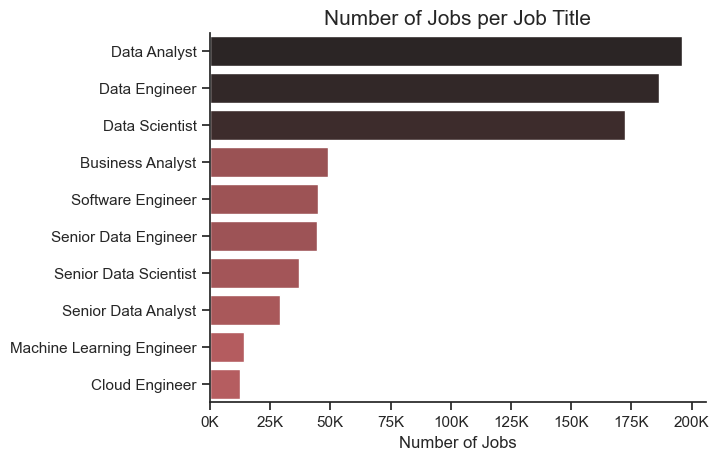

In [5]:
df_plot = df['job_title_short'].value_counts().to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot,
            x='count',
            y='job_title_short',
            hue='count',
            palette='dark:r_r',
            legend=False)
sns.despine()
plt.title('Number of Jobs per Job Title', fontsize=15)
plt.xlabel('Number of Jobs', fontsize=12)
plt.ylabel('')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))
plt.show()

### Countries to Explore

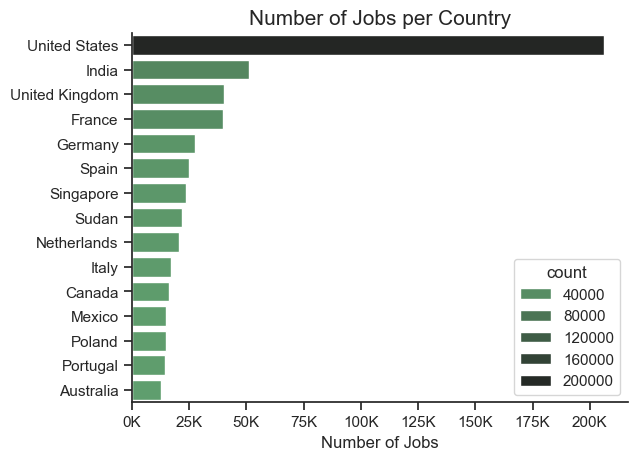

In [6]:
df_plot = df['job_country'].value_counts().head(15).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot,
            x='count',
            y='job_country',
            hue='count',
            palette='dark:g_r')
sns.despine()
plt.title("Number of Jobs per Country", fontsize=15)
plt.xlabel('Number of Jobs', fontsize=12)
plt.ylabel('')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))
plt.show()

### Companies to Explore

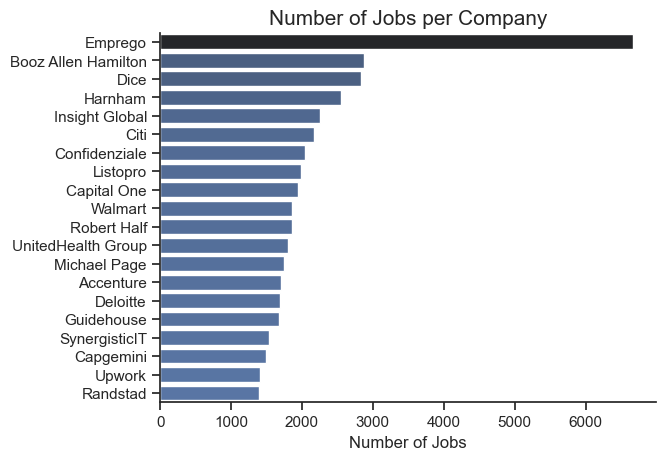

In [7]:
df_plot = df['company_name'].value_counts().head(20).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot,
            x='count',
            y='company_name',
            hue='count',
            palette='dark:b_r')
sns.despine()
plt.title("Number of Jobs per Company", fontsize=15)
plt.xlabel('Number of Jobs', fontsize=12)
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()

#### Job Opportunities

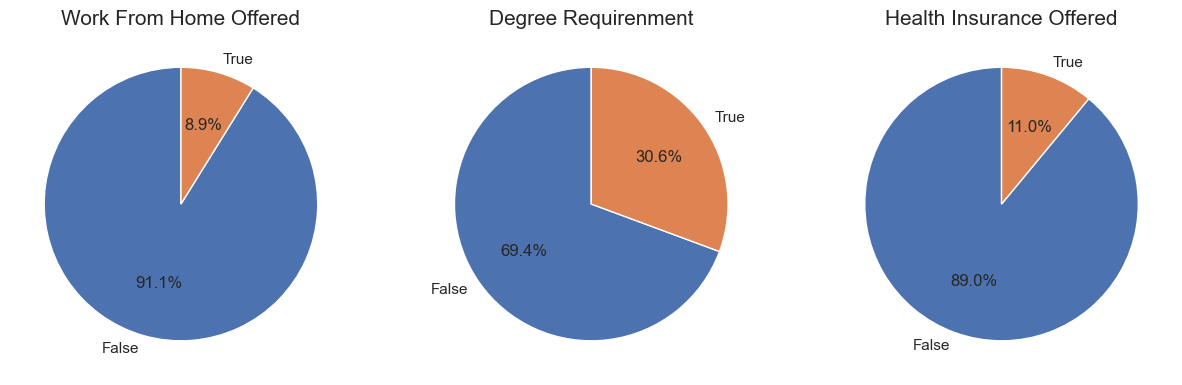

In [8]:
dict_column = {
    'job_work_from_home' : 'Work From Home Offered',
    'job_no_degree_mention' : 'Degree Requirenment',
    'job_health_insurance' : 'Health Insurance Offered'
    }

fig, ax = plt.subplots(1, 3, figsize=(15,6))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), startangle=90, labels=['False', 'True'], autopct='%1.1f%%')
    ax[i].set_title(title, fontsize=15)

plt.show()

# Filter for United States Data Analyst Jobs

In [9]:
df_US_DA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')]

In [10]:
df_US_DA.sample(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
145461,Data Analyst,Data analyst finance accounting,"Dover, DE",via Jooble,Full-time,False,"New York, United States",2023-06-18 08:00:18,False,True,United States,None,NaN,NaN,Sunrun,"[sql, python, snowflake, oracle, tableau, sheets]","{'analyst_tools': ['tableau', 'sheets'], 'clou..."
41936,Data Analyst,Data Scientist/Research Analyst - Now Hiring,"New York, NY",via Snagajob,Full-time,False,"New York, United States",2023-04-16 06:19:12,False,True,United States,None,NaN,NaN,Franklin Templeton,None,None
654516,Data Analyst,Data Analyst III (Healthcare Analytics),"Miami Gardens, FL",via Adzuna,Full-time,False,"Florida, United States",2023-06-03 10:01:30,False,True,United States,None,NaN,NaN,Corporate,"[python, r]","{'programming': ['python', 'r']}"
341208,Data Analyst,"Manager, Data Analytics","Boston, MA",via LinkedIn,Full-time,False,"New York, United States",2023-07-12 23:00:29,False,False,United States,None,NaN,NaN,SimpliSafe,"[sql, tableau]","{'analyst_tools': ['tableau'], 'programming': ..."
394916,Data Analyst,Data Analyst,"Summit, NJ",via LinkedIn,Contractor,False,"New York, United States",2023-01-17 18:00:11,False,False,United States,None,NaN,NaN,"Sunrise Systems, Inc.","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."


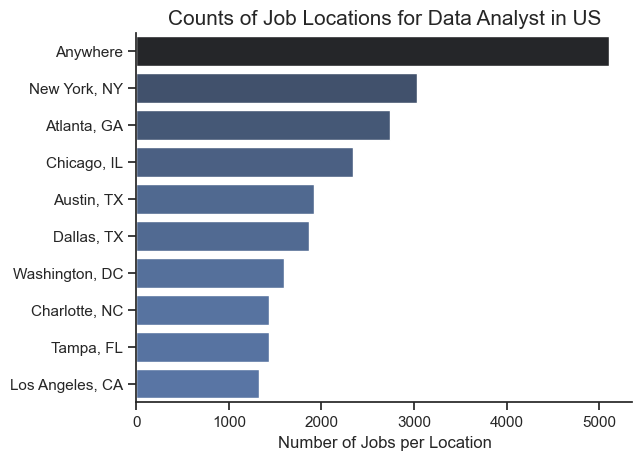

In [11]:
df_plot = df_US_DA['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot,
            x='count',
            y='job_location',
            hue='count',
            palette='dark:b_r',
            legend=False)
sns.despine()
plt.title('Counts of Job Locations for Data Analyst in US', fontsize=15)
plt.xlabel('Number of Jobs per Location')
plt.ylabel('')
plt.show()

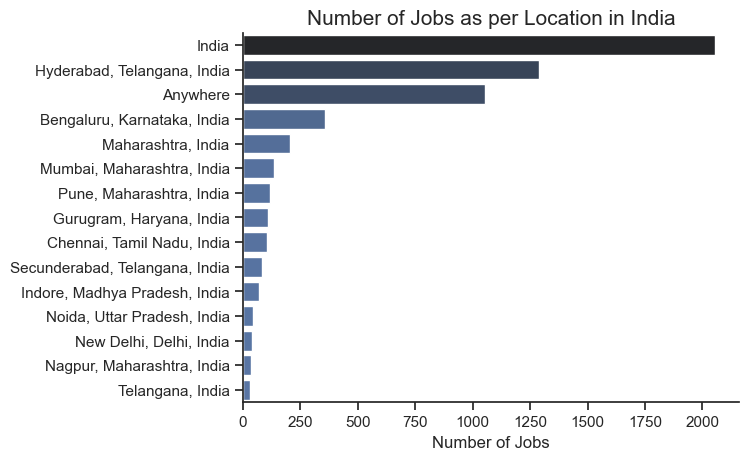

In [12]:
df_DA_IND = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')]

df_plot = df_DA_IND['job_location'].value_counts().head(15).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot,
            x='count',
            y='job_location',
            hue='count',
            palette='dark:b_r',
            legend=False)
sns.despine()
plt.title("Number of Jobs as per Location in India", fontsize=15)
plt.xlabel('Number of Jobs', fontsize=12)
plt.ylabel('')
plt.show()

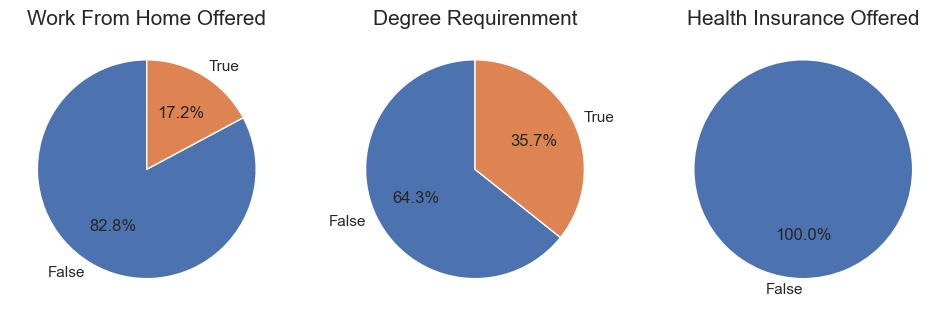

In [13]:
dict_column = {
    'job_work_from_home' : 'Work From Home Offered',
    'job_no_degree_mention' : 'Degree Requirenment',
    'job_health_insurance' : 'Health Insurance Offered'
    }

fig, ax = plt.subplots(1, 3, figsize=(12, 6))
for i, (column, title) in enumerate(dict_column.items()):
    values = df_DA_IND[column].value_counts(sort=False)
    ax[i].pie(values, startangle=90, labels=values.index, autopct='%1.1f%%')
    ax[i].set_title(title, fontsize=15)

plt.show()

### Companies to Explore in India

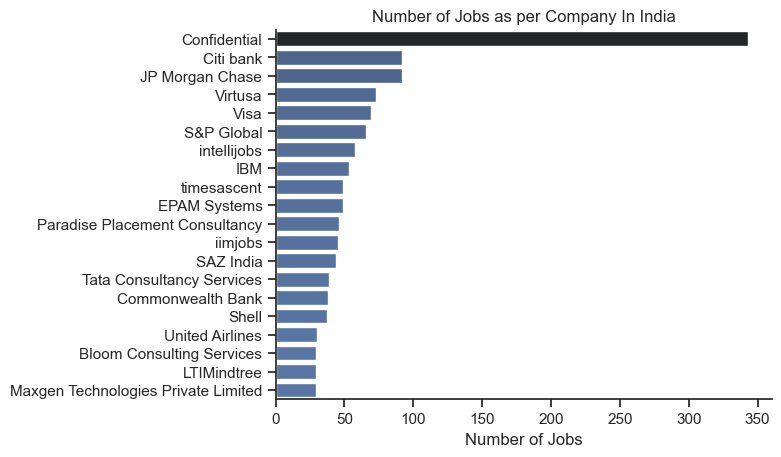

In [35]:
df_IND = df[df['job_location'] == 'India']

df_plot = df_IND['company_name'].value_counts().head(20).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot,
             x='count',
             y='company_name',
             hue='count',
             palette='dark:b_r',
             legend=False)
sns.despine()
plt.title("Number of Jobs as per Company In India")
plt.xlabel("Number of Jobs")
plt.ylabel("")
plt.show()